In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
db_albuns = pd.read_csv('spotify_albums.csv')


##Análise dos dados

In [2]:
db_albuns.describe()



,Unnamed: 0,total_tracks
count,75511.000000,75511.000000
mean,37755.000000,8.235807
std,21798.292425,11.669811
min,0.000000,1.000000
25%,18877.500000,1.000000
50%,37755.000000,5.000000
75%,56632.500000,12.000000
max,75510.000000,977.000000


##Dados Nulos

In [3]:
db_albuns.isnull().sum()

Unnamed: 0                0
album_type                0
artist_id                 0
available_markets         0
external_urls             0
href                      0
id                        0
images                    0
name                      0
release_date              0
release_date_precision    0
total_tracks              0
track_id                  0
track_name_prev           0
uri                       0
type                      0
dtype: int64

##Verificando Outliers

In [4]:
# Importando numpy para fazer cálculos com percentil
def drop_outliers(base, variavel):
    outliers = []
    # Calcula Q1 (25º percentil) para a variável dada
    Q1 = np.percentile(base[variavel], 25)
    
    # Calcula Q3 (75º percentil) para a variável dada
    Q3 = np.percentile(base[variavel], 75)
    
    # Usa IQR (interquartile range) para calcular um passo de outlier
    IQR = Q3-Q1
    passo = 1.5 * IQR
    
    # Mostrando os outliers
    print("Pontos considerados outliers para a variável'{}':".format(variavel))
    display(base[~((base[variavel] >= Q1 - passo) & (base[variavel] <= Q3 + passo))])
    
    feature_outliers = base[~((base[variavel] >= Q1 - passo) & (base[variavel] <= Q3 + passo))]
    outliers.extend(list(feature_outliers.index.values))
    
    return outliers

outliers = drop_outliers(db_albuns, 'total_tracks')
base_sem_outliers = db_albuns.drop(db_albuns.index[outliers]).reset_index(drop = True)



Pontos considerados outliers para a variável'total_tracks':


,Unnamed: 0,album_type,artist_id,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
28,28,album,2l4vGfFV7e46yO8lxfxR76,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4G...,https://api.spotify.com/v1/albums/4GnC2577oJuF...,4GnC2577oJuFzXIzVUua09,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Boccherini: Cello Concertos, Stabat Mater & Qu...",2019-02-22,day,31,0aAto38xlKoTxgZMQU5V4I,track_25,spotify:album:4GnC2577oJuFzXIzVUua09,album
34,34,album,01qfekYoPTQtu4vq8veHE6,"['DK', 'FI', 'IS', 'NO', 'SE', 'US']",{'spotify': 'https://open.spotify.com/album/4V...,https://api.spotify.com/v1/albums/4VobhvE3frJs...,4VobhvE3frJs7HDPuQZwHe,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Viisitoista kesää - 32 suosikkia,2014-07-18,day,32,2dwkcGaPTPX4IwbiyuIbph,track_20,spotify:album:4VobhvE3frJs7HDPuQZwHe,album
42,42,album,37XPhuXDGNS3x6ohVUtKK8,"['DK', 'FI', 'IS', 'NO', 'SE']",{'spotify': 'https://open.spotify.com/album/2I...,https://api.spotify.com/v1/albums/2IPjSoiY6ymg...,2IPjSoiY6ymgY2OqOXB8Ia,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Täydet 100,2013-06-14,day,100,7gt9RiJJypZzTeiu5l3XGY,track_31,spotify:album:2IPjSoiY6ymgY2OqOXB8Ia,album
57,57,album,3wnm0pkc0sPfV7UI2xlZlW,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4F...,https://api.spotify.com/v1/albums/4FK3eJMWI0il...,4FK3eJMWI0ilLjbXdpA6Fa,"[{'height': 635, 'url': 'https://i.scdn.co/ima...",French Music for Ballet,2019-03-01,day,36,2TtQoNSp9LrBFuj4o9Jm97,track_6,spotify:album:4FK3eJMWI0ilLjbXdpA6Fa,album
73,73,compilation,3DM2doVZ7aZdJ1h3FszAFd,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1x...,https://api.spotify.com/v1/albums/1x0Mm1LyCbtv...,1x0Mm1LyCbtvvh1oENZUzs,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Vuosikirja 1975 - 50 hittiä,2007-12-10,day,50,0uYnyLKQ0cpz6KqLC1VfOf,track_33,spotify:album:1x0Mm1LyCbtvvh1oENZUzs,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75200,75200,album,4rbIShE6F15tj5tkLKjK6C,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/5G...,https://api.spotify.com/v1/albums/5G4I0Bt2RDbE...,5G4I0Bt2RDbEUMbcv4pOSx,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Yoga Musik für Kinder: Entspannungsmusik für K...,2016-01-13,day,30,7DD86xRbdz2O5GFgyvGsjw,track_3,spotify:album:5G4I0Bt2RDbEUMbcv4pOSx,album
75226,75226,album,7dZlXoQy5OQpEG4rwguuOp,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/0J...,https://api.spotify.com/v1/albums/0JWPaGWXspUd...,0JWPaGWXspUdDkVMXAbboF,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Vallenatos,2015,year,34,3DXD6sooqwHvNUW8e9VROw,track_21,spotify:album:0JWPaGWXspUdDkVMXAbboF,album
75329,75329,album,5dXbkgq9goxRAwCFoNU9Dp,"['AT', 'CH', 'DE', 'LI']",{'spotify': 'https://open.spotify.com/album/0p...,https://api.spotify.com/v1/albums/0phz5qy6MosH...,0phz5qy6MosHH03ZpG4KlT,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",25 Jahre Abenteuer Leben,2017-09-15,day,38,3CXCSDeLa8tmiG84onlQpx,track_2,spotify:album:0phz5qy6MosHH03ZpG4KlT,album
75349,75349,album,2jW1i8fKDiIs2FYRDtSkB1,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/2A...,https://api.spotify.com/v1/albums/2AQwWgRb6tyJ...,2AQwWgRb6tyJlfc6eCAyZf,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Kunnian päivät 1983 - 86,2006-11-08,day,52,0ct8MyPT0iMgNTnlxMErjR,track_21,spotify:album:2AQwWgRb6tyJlfc6eCAyZf,album


In [5]:
db_albuns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              75511 non-null  int64 
 1   album_type              75511 non-null  object
 2   artist_id               75511 non-null  object
 3   available_markets       75511 non-null  object
 4   external_urls           75511 non-null  object
 5   href                    75511 non-null  object
 6   id                      75511 non-null  object
 7   images                  75511 non-null  object
 8   name                    75511 non-null  object
 9   release_date            75511 non-null  object
 10  release_date_precision  75511 non-null  object
 11  total_tracks            75511 non-null  int64 
 12  track_id                75511 non-null  object
 13  track_name_prev         75511 non-null  object
 14  uri                     75511 non-null  object
 15  ty

##Exclusão de colunas 

In [6]:
db_albuns_backup = base_sem_outliers
db_albuns = base_sem_outliers
db_albuns.drop(['Unnamed: 0','href', 'external_urls', 'images', 'uri'], axis=1, inplace=True)
db_albuns


,album_type,artist_id,available_markets,id,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,type
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1gAM7M4rBwEbSPeAQR2nx1,If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,album
1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",4KfJZV7WfolYlxBzOTo66s,Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,album
2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",7nLYY7uAVUb57kpd7tZxnS,Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,track_15,album
3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",6p20Rt4x2Qn5mUMRi1s6pj,Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,track_46,album
4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1XeoOqC1q7U2iyLEQJ64cu,Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,track_10,album
...,...,...,...,...,...,...,...,...,...,...,...
72963,album,0S7CCsKpXJ8e1dIstizHw5,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",4ZbkQn6amf1t3a202zen2u,Latino For Life,2014-01-24,day,13,3CZY7jD1Zf30zIdbwS5212,track_17,album
72964,album,73Vk4dL8kYkbRJxWJDq1wL,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",4DifRQy4Dyey9NSS7ywnEx,Dime Qué Pasa,2011-03-31,day,11,7GOBsKucPG5Bh8qzStmrQ6,track_18,album
72965,album,3yW6jTzGjHUUkLvLkjLOVn,"['AU', 'NZ']",4PXy3cBCNeY0ZVKTOGi9Cw,"Black Fingernails, Red Wine",2006-06-10,day,13,0ujklxrVM2jwpLMgbTwTd1,track_7,album
72966,album,4iudEcmuPlYNdbP3e1bdn1,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",511p6iaCuK8Sr0BYdpcfkq,Freak Show,1997,year,13,58nHFSWj5N5JxNtWgS85TL,track_14,album


##Qtd de musica por decada

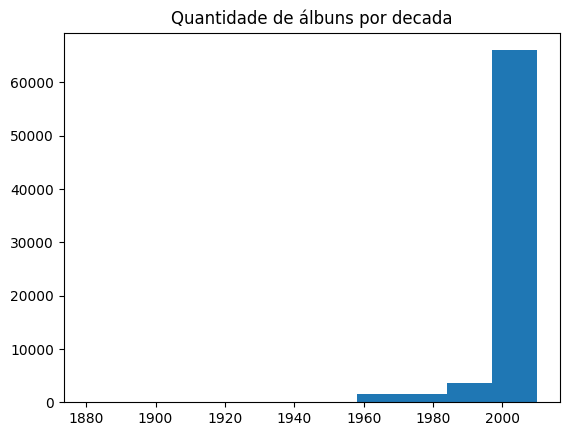

In [7]:
db_albuns['release_date'] = pd.to_datetime(db_albuns['release_date'],format='mixed' ,errors='coerce').dt.year
db_albuns['decada'] = (db_albuns['release_date']//10) * 10

plt.hist(db_albuns['decada'])
plt.title('Quantidade de álbuns por decada')
plt.show()

##Quantidade de album/single/compilation

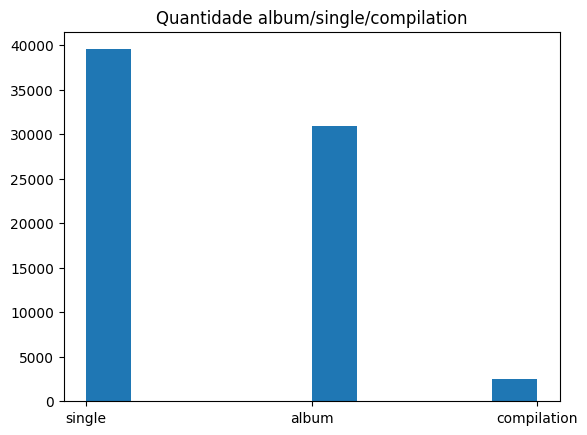

In [8]:
plt.hist(db_albuns['album_type'])
plt.title('Quantidade album/single/compilation')
plt.show()